In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2

import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [3]:
tumour_images=[]
for name in glob.glob('/content/drive/MyDrive/brain MRI/yes/*.jpg'): 
    image = cv2.imread(name)
    image = cv2.resize(image,(240,240))
    tumour_images.append(image)

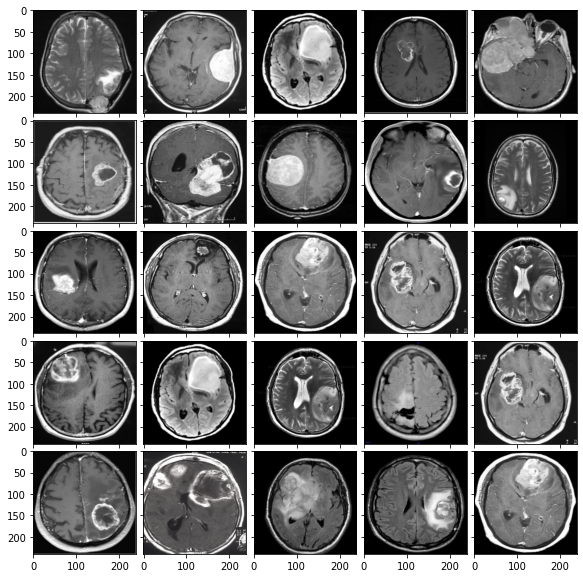

In [ ]:
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 5),  axes_pad=0.1,   )
for ax, im in zip(grid, tumour_images[0:25]):
    ax.imshow(im)
plt.show()

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, 
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode ='nearest')

validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)
train_generator = train_datagen.flow_from_dataframe(dataframe = x_train,
                                                   x_col = 'filepaths',
                                                   y_col = 'labels',
                                                   target_size=(150,150),
                                                   class_mode='binary',
                                                    batch_size=16)
validation_generator = validation_datagen.flow_from_dataframe(dataframe = x_val,
                                                             x_col = 'filepaths',
                                                             y_col = 'labels',
                                                             target_size = (150,150),
                                                             class_mode='binary',
                                                             batch_size=8)

test_generator = test_datagen.flow_from_dataframe(dataframe = x_test,
                                                  x_col = 'filepaths',
                                                  y_col = 'labels',
                                                  target_size = (150,150),
                                                  class_mode='binary',
                                                  batch_size=8)

NameError: ignored

In [ ]:
IMAGE_SIZE = [224, 224, 3]
batch_size = 64
train_path = '/content/drive/MyDrive/brain MRI'
folders = glob(train_path+'/*')
print(folders)
noclasses = len(folders)
print(noclasses)

['/content/drive/MyDrive/brain MRI/yes', '/content/drive/MyDrive/brain MRI/no']
2


In [ ]:
for path in folders:
    files = glob(path+'/*')
    print(path, len(files))

/content/drive/MyDrive/brain MRI/yes 155
/content/drive/MyDrive/brain MRI/no 98


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for i, layer in enumerate(vgg.layers):
    if i<15:
        layer.trainable = False
    
    print(i, layer, layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x7f6fd850d250> False
1 <keras.layers.convolutional.Conv2D object at 0x7f6fd850d310> False
2 <keras.layers.convolutional.Conv2D object at 0x7f6fd84e5b50> False
3 <keras.layers.pooling.MaxPooling2D object at 0x7f6fd7bfac50> False
4 <keras.layers.convolutional.Conv2D object at 0x7f6fd7c27310> False
5 <keras.layers.convolutional.Conv2D object at 0x7f7051b48b50> False
6 <keras.layers.pooling.MaxPooling2D object at 0x7f6fd43e9a50> False
7 <keras.layers.convolutional.Conv2D object at 0x7f6fd7c2f490> False
8 <keras.layers.convolutional.Conv2D object at 0x7f6fd4400910> False
9 <keras.layers.convolutional.Conv2D object at 0x7f6fd43f0e90> False
10 <keras.layers.pooling.MaxPooling2D object at 0x7f6fd4409d90> False
11 <keras.layers.convolutional.Conv2D object at 0x7f6fd4412090> False
12 <keras.layers.convolutional.Conv2D object at 0x7f6fd4417990> False
13 <keras.layers.convolutional.Conv2D object at 0x7f6fd4405250> False
14 <keras.layers.pooling.Max

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(noclasses, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory(train_path, 
                                              shuffle=True,
                                              target_size = (224,224),
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              subset='training') # set as training data

test_generator = datagen.flow_from_directory(train_path, 
                                             shuffle=False,
                                             target_size = (224,224),
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             subset='validation') # set as validation data

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
model_history = model.fit(train_generator, 
                          validation_data=test_generator,
                          epochs=25,
                          steps_per_epoch=len(train_generator),
                          validation_steps=len(test_generator),
                          initial_epoch=20)

Epoch 21/25
4/4 [==============================] - 159s 40s/step - loss: 1.9275 - accuracy: 0.5320 - val_loss: 0.7019 - val_accuracy: 0.4400
Epoch 22/25
4/4 [==============================] - 157s 40s/step - loss: 0.6923 - accuracy: 0.5419 - val_loss: 0.6270 - val_accuracy: 0.7200
Epoch 23/25
4/4 [==============================] - 141s 34s/step - loss: 0.6637 - accuracy: 0.6305 - val_loss: 0.6127 - val_accuracy: 0.6400
Epoch 24/25
4/4 [==============================] - 140s 44s/step - loss: 0.6246 - accuracy: 0.6601 - val_loss: 0.6018 - val_accuracy: 0.7400
Epoch 25/25
4/4 [==============================] - 143s 35s/step - loss: 0.5817 - accuracy: 0.7094 - val_loss: 0.6602 - val_accuracy: 0.7000


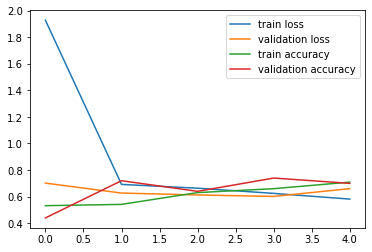

In [ ]:
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='validation loss')
plt.plot(model_history.history['accuracy'], label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(test_generator)

In [ ]:
pred = np.argmax(pred, axis=1)

In [ ]:
pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1])

In [ ]:
test_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
print(accuracy_score(test_generator.labels, pred))
print(f1_score(test_generator.labels, pred,average='weighted'))
print(confusion_matrix(test_generator.labels, pred))

0.62
0.6217570407734342
[[10  9]
 [10 21]]


In [ ]:
print(accuracy_score(test_generator.labels, pred))
print(f1_score(test_generator.labels, pred,average='weighted'))
print(confusion_matrix(test_generator.labels, pred))

0.62
0.6217570407734342
[[10  9]
 [10 21]]


In [ ]:
model.save('VGG16.h5')

In [ ]:
model_name = ResNet50(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

for i, layer in enumerate(model_name.layers):
    if i<165:
        layer.trainable = False
    
    print(i, layer, layer.trainable)
    
x = Flatten()(model_name.output)
prediction = Dense(noclasses, activation='softmax')(x)
model = Model(inputs=model_name.input, outputs=prediction)

94781440/94765736 [==============================] - 1s 0us/step
0 <keras.engine.input_layer.InputLayer object at 0x7f6fd0cb4650> False
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f6fd0cb4b90> False
2 <keras.layers.convolutional.Conv2D object at 0x7f6fd0cb2610> False
3 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f6fd0cd5750> False
4 <keras.layers.core.activation.Activation object at 0x7f6fd0e08750> False
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7f6fd0ce1d10> False
6 <keras.layers.pooling.MaxPooling2D object at 0x7f6fd0d39410> False
7 <keras.layers.convolutional.Conv2D object at 0x7f6fd0cfbf50> False
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f6fd0c614d0> False
9 <keras.layers.core.activation.Activation object at 0x7f6fd0ce9190> False
10 <keras.layers.convolutional.Conv2D object at 0x7f6fd0ca9d10> False
11 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory(train_path, 
                                              shuffle=True,
                                              target_size = (224,224),
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              subset='training') # set as training data

test_generator = datagen.flow_from_directory(train_path, 
                                             shuffle=False,
                                             target_size = (224,224),
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             subset='validation')

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
model_history = model.fit(train_generator, 
                          validation_data=test_generator,
                          epochs=30,
                          steps_per_epoch=len(train_generator),
                          validation_steps=len(test_generator))

Epoch 1/30
4/4 [==============================] - 52s 12s/step - loss: 6.0779 - accuracy: 0.4729 - val_loss: 2.0503 - val_accuracy: 0.5800
Epoch 2/30
4/4 [==============================] - 46s 11s/step - loss: 2.0884 - accuracy: 0.7094 - val_loss: 8.1807 - val_accuracy: 0.3800
Epoch 3/30
4/4 [==============================] - 48s 15s/step - loss: 0.6860 - accuracy: 0.7241 - val_loss: 1.0737 - val_accuracy: 0.7200
Epoch 4/30
4/4 [==============================] - 45s 14s/step - loss: 0.6850 - accuracy: 0.6798 - val_loss: 1.1630 - val_accuracy: 0.6400
Epoch 5/30
4/4 [==============================] - 45s 11s/step - loss: 0.7600 - accuracy: 0.6798 - val_loss: 3.6212 - val_accuracy: 0.4600
Epoch 6/30
4/4 [==============================] - 44s 11s/step - loss: 0.7937 - accuracy: 0.6601 - val_loss: 1.4322 - val_accuracy: 0.6400
Epoch 7/30
4/4 [==============================] - 45s 11s/step - loss: 0.8568 - accuracy: 0.6995 - val_loss: 6.6932 - val_accuracy: 0.4000
Epoch 8/30
4/4 [===========

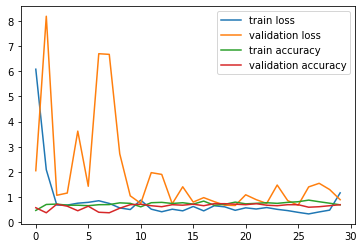

In [ ]:
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='validation loss')
plt.plot(model_history.history['accuracy'], label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

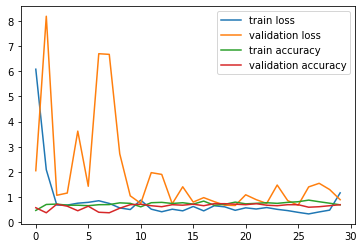

In [ ]:
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='validation loss')
plt.plot(model_history.history['accuracy'], label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(test_generator)
pred = np.argmax(pred, axis=1)
pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
test_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
print(accuracy_score(test_generator.labels, pred))
print(f1_score(test_generator.labels, pred,average='weighted'))
print(confusion_matrix(test_generator.labels, pred))

0.66
0.6615720891130726
[[11  8]
 [ 9 22]]


In [ ]:
print(accuracy_score(test_generator.labels, pred))
print(f1_score(test_generator.labels, pred,average='weighted'))
print(confusion_matrix(test_generator.labels, pred))

0.66
0.6615720891130726
[[11  8]
 [ 9 22]]


In [ ]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [ ]:
files = glob.glob('/content/drive/MyDrive/brain MRI**/*.jpg')

label = []
for file in files:
    if 'no' in file:
        label.append(0)
    else:
        label.append(1)
images = []
width = 126
height = 126
for file in files:
    img= Image.open(file)
    image = img.resize((width, height), Image.ANTIALIAS)    
    arr_img = np.array(image)
    arr_img = arr_img[:,:,0] if len(arr_img.shape) == 3 else arr_img 
    images.append(arr_img)
images_,labels = shuffle(images,label)
arrimage = np.array(images_)
#plt.imshow(arrimage[0,:126],cmap='gray')

In [ ]:
def model():
    model = Sequential()
    model.add(Conv2D(50, kernel_size=(3,3), padding='same', activation='relu', input_shape=(126, 126,1)))
    model.add(Conv2D(75, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(125, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

In [ ]:
length = len(label)
size = round(length*0.8)    

In [ ]:
train_x = arrimage[:size,:width-1,:height-1,np.newaxis]
test_x = arrimage[size:,:width-1,:height-1,np.newaxis]
train_y = labels[:size]
test_y = labels[size:]

IndexError: ignored

In [ ]:
models = model()
models.fit(train_generator, 
                          validation_data=test_generator,
                          epochs=30,
                          steps_per_epoch=len(train_generator),
                          validation_steps=len(test_generator))

Epoch 1/30


UnimplementedError: ignored

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from os import listdir
import imutils
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from sklearn.model_selection import train_test_split

In [5]:
#method for cropping image i.e. for getting brain area
def crop_brain_contour(image, plot=False):
    
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Preprocessed Image')
        
        plt.show()
    
    return new_image

In [6]:
# function for loading images and labels into X and y..in X, it will store images.. 
#and in y it will store actual image label (0 or 1) for each image..if 0 no tumor,1 then tumorous image
def load_data(dir_list, image_size):
    
    # load all images in a directory
    X = []
    y = []
    
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in listdir(directory):
            # load the image
            image = cv2.imread(directory + '/' + filename)
            
            # crop the brain and ignore the unnecessary rest part of the image
            image = crop_brain_contour(image, plot=False)
            # resize image
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            # normalize values
            image = image / 255.
            # convert image to numpy array and append it to X
            X.append(image)
            # append a value of 1 to the target array if the image
            # is in the folder named 'yes', otherwise append 0.
            if directory[-3:] == 'yes':
                y.append([1])
            else:
                y.append([0])
                
    X = np.array(X)
    y = np.array(y)
    
    # Shuffle the data
    X, y = shuffle(X, y)
    
    print(f'Number of examples is: {len(X)}')
    print(f'X shape is: {X.shape}')
    print(f'y shape is: {y.shape}')
    
    return X, y

In [7]:
#path for yes and no folder
yes = "/content/drive/MyDrive/brain MRI/yes"
no = "/content/drive/MyDrive/brain MRI/no"

In [8]:
#image size specified
IMG_WIDTH, IMG_HEIGHT = (256, 256)
#calling load function for loading X,y data by passing both folder paths
X, y = load_data([yes,no], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 253
X shape is: (253, 256, 256, 3)
y shape is: (253, 1)


In [9]:
def split_data(X, y, test_size=0.2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    return X_train, y_train, X_test, y_test

In [10]:
#data splitting
X_train, y_train,X_test, y_test = split_data(X, y, test_size=0.3)

In [11]:
#loading vgg16 pretrained model
from keras.applications.vgg16 import VGG16
SIZE=256
VGG_model=VGG16(input_shape=(SIZE,SIZE,3),include_top=False,weights='imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [12]:
#we are not not using VGG16 model for training...so we made all layers as non trainable
for layer in VGG_model.layers:
    layer.trainable=False

In [13]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [16]:
#saving vgg model into file for further use
VGG_model.save("/content/drive/My Drive/VGG_model.h5")

In [17]:
#extract features for training data
feature_ex=VGG_model.predict(X_train)

In [18]:
feature_ex.shape

(177, 8, 8, 512)

In [19]:
features=feature_ex.reshape(feature_ex.shape[0],-1)

In [20]:
features.shape

(177, 32768)

In [21]:
#extract features for testing data
test_feature_ex=VGG_model.predict(X_test)
test_features=test_feature_ex.reshape(test_feature_ex.shape[0],-1)

In [23]:
test_features.shape

(76, 32768)

In [24]:
test_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.7690244 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.0415151 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.9385006 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.0352947 ,
        0.        ],
       [0.41806054, 0.        , 0.        , ..., 0.        , 1.315119  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.9994047 ,
        0.        ]], dtype=float32)

In [22]:
#Pass features to classifier model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using thetraining features extracted by VGG16 i.e.features...and the labels i.e y_train
clf.fit(features, y_train)

#Predict the response for test features
y_pred = clf.predict(test_features)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
#testing accuracy
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.8421052631578947

In [27]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


# accuracy: (tp + tn) / (p + n)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy_svm)
# precision tp / (tp + fp)
precision_svm = precision_score(y_test, y_pred)
print('Precision: %f' % precision_svm)
# recall: tp / (tp + fn)
recall_svm = recall_score(y_test, y_pred)
print('Recall: %f' % recall_svm)
# f1: 2 tp / (2 tp + fp + fn)
f1_svm = f1_score(y_test, y_pred)
print('F1 score: %f' % f1_svm)

Accuracy: 0.842105
Precision: 0.780000
Recall: 0.975000
F1 score: 0.866667


In [28]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.savefig('/content/drive/My Drive/accuracy_plot.pdf',dpi=300,bbox_inches='tight')

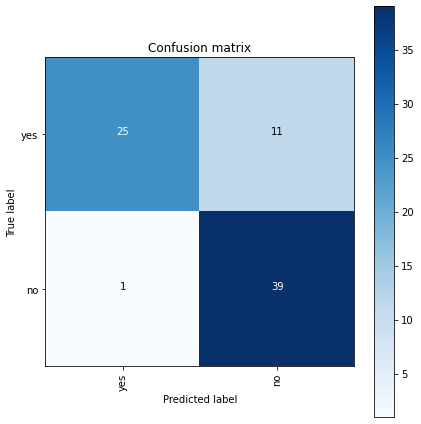

<Figure size 432x288 with 0 Axes>

In [29]:
labels = ['yes','no']
confusion_mtx = confusion_matrix(y_test, y_pred) 
cm = plot_confusion_matrix(confusion_mtx, classes = labels, normalize=False)

In [30]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[25 11]
 [ 1 39]]


In [31]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [32]:
#read image and preprocess it
path="/content/drive/MyDrive/brain MRI/no/No13.jpg"
img=cv2.imread(path)
img = crop_brain_contour(img, plot=False)
img = cv2.resize(img, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
img = img / 255.
from keras.preprocessing import image
test_image = image.img_to_array(img)
test_image = np.expand_dims(test_image, axis = 0)

In [95]:
img1.shape

(224, 224, 3)

In [33]:
img1 = cv2.resize(img, dsize=(224,224), interpolation=cv2.INTER_CUBIC)

In [34]:
test_image1 = image.img_to_array(img1)
test_image1 = np.expand_dims(test_image1, axis = 0)

In [103]:
test_image1.shape

(1, 224, 224, 3)

In [36]:
vggmodel = load_model("/content/drive/MyDrive/VGG_model.h5")

In [38]:
#get features for input image
test_f=vggmodel.predict(test_image)

In [127]:
test_image.shape

(1, 256, 256, 3)

In [128]:
test_f.shape

(1, 32768)

In [39]:
#reshape features
test_f=test_f.reshape(test_f.shape[0],-1)

In [44]:
test_f.shape

(1, 32768)

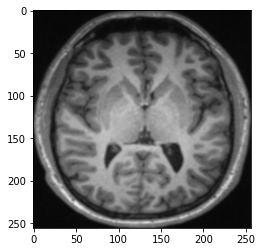

In [46]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [41]:
#load svm model which is generated already
filename = '/content/drive/My Drive/finalized_model.sav' 
svm_model = pickle.load(open(filename, 'rb'))

In [42]:
prediction_svm=svm_model.predict(test_f)
if(prediction_svm[0]==0):
   print("No tumor detected")
else:
   print("Tumor detected")

No tumor detected


In [134]:
#read image and preprocess it
path="/content/drive/MyDrive/brain MRI/yes/Y109.JPG"
img_yes=cv2.imread(path)
img_yes = crop_brain_contour(img_yes, plot=False)
img_yes = cv2.resize(img_yes, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
img_yes = img_yes / 255.
from keras.preprocessing import image
test_image_yes = image.img_to_array(img_yes)
test_image_yes = np.expand_dims(test_image_yes, axis = 0)

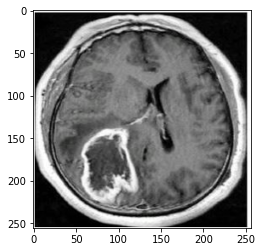

In [135]:
plt.imshow(img_yes)

In [136]:
img_yes.shape

(256, 256, 3)

In [139]:
vggmodel = VGG_model

In [141]:
test_f_yes=vggmodel.predict(test_image_yes)

In [142]:
#reshape features
test_f_yes=test_f_yes.reshape(test_f.shape[0],-1)

In [143]:
#load svm model which is generated already
filename = '/content/drive/My Drive/finalized_model.sav' 
svm_model = pickle.load(open(filename, 'rb'))

In [144]:
prediction_svm=svm_model.predict(test_f_yes)
if(prediction_svm[0]==0):
   print("No tumor detected")
else:
   print("Tumor detected")

Tumor detected
